# E9 - Random Forest - Boosting

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

## Car Price Prediction

Predict if the price of a car is low or high

In [101]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [102]:
%matplotlib inline
import pandas as pd
import datetime

data = pd.read_csv('Dataset/dataTraincarListings.csv')
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
#data = data.drop(['Model', 'Price'], axis=1)
data['old_car']=(data['Year'] -  datetime.datetime.now().year ).abs().astype(int)
data.head()

,Price,Year,Mileage,Model,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice,old_car
15,17991,2016,29242,CamryLE,0,0,0,0,1,0,0,1,5
47,15895,2015,26465,CamryLE,0,0,0,0,1,0,0,1,6
85,15099,2012,46739,Camry4dr,0,1,0,0,0,0,0,1,9
141,16667,2017,41722,CamrySE,0,0,0,0,0,1,0,1,4
226,12855,2014,77669,CamryXLE,0,0,0,0,0,0,1,0,7


In [103]:
data.shape

(13150, 13)

In [104]:
data.describe()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice,old_car
count,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000,13150.000000
mean,14539.455970,2013.560304,52345.992776,0.056426,0.157338,0.012548,0.049430,0.234373,0.378403,0.111483,0.579544,7.439696
std,3911.640821,3.109673,36583.768481,0.230751,0.364133,0.111315,0.216772,0.423622,0.485007,0.314741,0.493651,3.109673
min,5002.000000,1998.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,11999.250000,2012.000000,26375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,15000.000000,2014.000000,41658.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
75%,16998.000000,2016.000000,70763.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,9.000000
max,32950.000000,2018.000000,232658.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000


In [105]:
data.dtypes

Price           int64
Year            int64
Mileage         int64
Model          object
M_Camry         uint8
M_Camry4dr      uint8
M_CamryBase     uint8
M_CamryL        uint8
M_CamryLE       uint8
M_CamrySE       uint8
M_CamryXLE      uint8
HighPrice       int64
old_car         int64
dtype: object

In [106]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='old_car', ylabel='Mileage'>

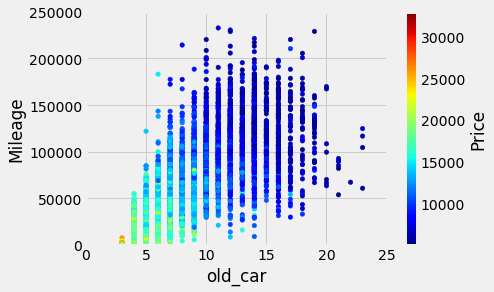

In [107]:
# scatter plot of Years versus Hits colored by Salary
data.plot(kind='scatter', x='old_car', y='Mileage', c='Price', colormap='jet', xlim=(0, 25), ylim=(0, 250000))

In [108]:
data = data.drop(['Model', 'Price','old_car'], axis=1)


In [109]:
y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Exercise 8.1

Estimate a Decision Tree Classifier Manually using the code created in the Notebook #13

Evaluate the accuracy on the testing set

### Building a Decision Tree by hand


In [111]:
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

For feature 1 calculate possible splitting points

In [112]:
j = 1
print(X_train.columns[j])

Mileage


In [113]:
# Split the variable in num_ctp points
splits = np.percentile(X_train.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())

In [114]:
# Only unique values for filter binary and few unique values features
splits = np.unique(splits)

In [115]:
splits

array([6.000000e+00, 1.603480e+04, 2.324080e+04, 2.987540e+04,
       3.565100e+04, 4.160950e+04, 4.849280e+04, 6.199830e+04,
       8.097420e+04, 1.061537e+05])

split the data using split 5

In [116]:
k = 5
filter_l = X_train.iloc[:, j] < splits[k]

y_l = y_train.loc[filter_l]
y_r = y_train.loc[~filter_l]



The Gini Impurity of a node is the probability that a randomly chosen sample in a node would be incorrectly labeled if it was labeled by the distribution of samples in the node.
For each node

In [117]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [118]:
gini_l = gini(y_l)
gini_l

0.20474618023837854

In [119]:
gini_r = gini(y_r)
gini_r

0.3959988713681828

### Gini function

In [120]:
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [121]:
gini_impurity(X_train.iloc[:, j], y_train, splits[k])



0.18743041714283493

### Best splits on all features


In [122]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [123]:
j, split, gain = best_split(X_train, y_train, 10)
j, split, gain

(1, 52187.63636363637, 0.23872134898880762)



En este punto encontramos que el mejor 'Feauture' es 'Mileage', y que el mejor punto para generar las ramas por izquierda y por derecha es, 52187.6363

In [124]:
X_train.columns

Index(['Year', 'Mileage', 'M_Camry', 'M_Camry4dr', 'M_CamryBase', 'M_CamryL',
       'M_CamryLE', 'M_CamrySE', 'M_CamryXLE'],
      dtype='object')



### A continuación dividimos los datos por izquierda y derecha con los parametros sugeridos:

In [125]:
filter_l = X_train.iloc[:, j] < split

y_l = y_train.loc[filter_l]
y_r = y_train.loc[~filter_l]

In [126]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(13150, 5606, 3204)

In [127]:
y.mean(), y_l.mean(), y_r.mean()

(0.5795437262357415, 0.839279343560471, 0.12109862671660425)



En este punto encontramos que por la inzquierda tenemos 83.9% de autos con precios altos, y por la derecha tenemos 12.10% de autos con precios altos.

### Recursively grow the tree

In [128]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [129]:
tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=1, num_pct=10)



{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 8810,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': -1,
  'n_samples': 5606,
  'gain': 0.03317687167496233},
 'sr': {'y_pred': 0,
  'y_prob': 0.12133499688084841,
  'level': 1,
  'split': -1,
  'n_samples': 3204,
  'gain': 0.04366470703709979}}

In [130]:
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=4, num_pct=10)

tree

{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 8810,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': [0, 2014.0],
  'n_samples': 5606,
  'gain': 0.03317687167496233,
  'sl': {'y_pred': 0,
   'y_prob': 0.36828644501278773,
   'level': 2,
   'split': [0, 2012.0],
   'n_samples': 389,
   'gain': 0.05908490521197157,
   'sl': {'y_pred': 0,
    'y_prob': 0.08,
    'level': 3,
    'split': [2, 1.0],
    'n_samples': 98,
    'gain': 0.01707452211653898,
    'sl': {'y_pred': 0,
     'y_prob': 0.04597701149425287,
     'level': 4,
     'split': -1,
     'n_samples': 85,
     'gain': 0.001980228771650633},
    'sr': {'y_pred': 0,
     'y_prob': 0.3333333333333333,
     'level': 4,
     'split': -1,
     'n_samples': 13,
     'gain': 0.3029585798816569}},
   'sr': {'y_pred': 0,
    'y_prob': 0.46757679180887374,
    'level': 3,
    'split': [1, 40957.63636363636],
    'n_samples'

### Prediction 

In [131]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [132]:
p=tree_predict(X_test, tree, proba=False)
p

array([1., 1., 1., ..., 1., 1., 0.])

In [133]:
len(p)

4340

### Accuracy

A continuación validamos el accuracy en test, y tambien validamos el threshold que mejor se ajusta

In [134]:
metrics.accuracy_score(p,y_test)

0.864516129032258

Encontramos un 'accuracy' del 86.45%. A continuación validamos con diferentes threshold:

In [135]:
threshold = 0
accuracy_scores = []

p=tree_predict(X_test, tree, proba=True)
p

for threshold in range(1,101,1):
    y_pred = (p >= threshold/100).astype(np.int)
    accuracy_scores.append(metrics.accuracy_score(y_pred,y_test))    

Text(0, 0.5, 'Accuracy')

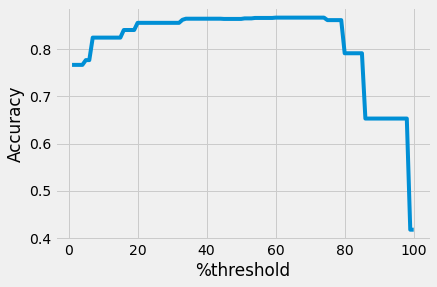

In [136]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(range(1,101,1), accuracy_scores)
plt.xlabel('%threshold')
plt.ylabel('Accuracy')

### Best Threshold and Accuracy

In [137]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(59, 0.8672811059907835)

El mejor accuracy encontrado fue de 86.72% tomando un threshold del 59%

### Sikit Learn

In [138]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

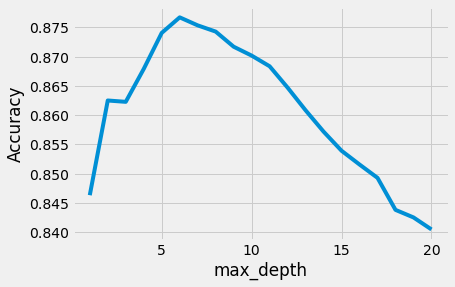

In [139]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [140]:
# show the best accuracy and the corresponding max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.8767300380228138, 6)

In [141]:
# max_depth=2 was best, so fit a tree using that parameter
clf = DecisionTreeClassifier(max_depth=6, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [142]:
# compute feature importances
feature_cols = X_train.columns
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
3,M_Camry4dr,0.000000
4,M_CamryBase,0.000000
7,M_CamrySE,0.000007
5,M_CamryL,0.000389
2,M_Camry,0.007466
8,M_CamryXLE,0.009693
6,M_CamryLE,0.017950
0,Year,0.172331
1,Mileage,0.792163


Con sklearn se encuentra que las variables mas importantes son 'Mileage', 'Year'.

In [143]:
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()


count    10.000000
mean      0.876730
std       0.010448
min       0.862357
25%       0.868821
50%       0.874905
75%       0.884791
max       0.893536
dtype: float64

# Exercise 8.2

Estimate a Bagging of 10 Decision Tree Classifiers Manually using the code created in the Notebook #7

Evaluate the accuracy on the testing set

### Primero se crean las muestras aleatorias

In [162]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]
n_B = 10

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([3582, 1346, 5218, ..., 5288, 5094, 8043]),
 array([ 431, 3426, 8463, ..., 8218,  237, 8326]),
 array([8477, 4773, 5743, ..., 1809,  214, 6910]),
 array([5885, 1492, 7249, ..., 1834,  137, 7586]),
 array([ 352, 4574, 5708, ..., 7142, 2081, 7438]),
 array([2311, 6342, 4124, ..., 8286, 8453, 1222]),
 array([5003, 7878, 7832, ..., 3522,  407, 3676]),
 array([6901, 1829, 1437, ..., 8100, 3585,  522]),
 array([2874, 2197, 2888, ...,  477, 5922, 4068]),
 array([5547, 7784, 7473, ..., 4908, 6648, 3622])]

In [163]:
# show the rows for the first decision tree
X_train.iloc[samples[0], :]

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
358005,2013,82246,1,0,0,0,0,0,0
137970,2016,38701,0,0,0,0,1,0,0
272337,2017,14302,0,0,0,0,0,1,0
354913,2017,35268,0,0,0,0,0,1,0
138402,2014,6455,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
110261,2014,22327,0,0,0,1,0,0,0
240532,2013,87215,0,0,0,0,0,0,1
305076,2015,24100,0,0,0,0,1,0,0
122421,2016,49095,0,0,0,0,0,1,0


### Build one tree for each sample

In [165]:
from sklearn.tree import DecisionTreeRegressor

# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# DataFrame for storing predicted price from each tree
y_pred = []


for i in range(n_B):
    X_train_tree = X_train.iloc[samples[i], :]
    y_train_tree = y_train.iloc[samples[i]]
    treereg.fit(X_train_tree, y_train_tree)
    y_pred.append(treereg.predict(X_test))



In [166]:
y_pred

[array([0., 1., 1., ..., 1., 1., 0.]),
 array([0., 1., 1., ..., 1., 1., 0.]),
 array([0., 1., 1., ..., 1., 1., 0.]),
 array([0., 1., 1., ..., 1., 1., 0.]),
 array([1., 1., 1., ..., 1., 1., 0.]),
 array([1., 1., 1., ..., 1., 1., 0.]),
 array([0., 1., 1., ..., 1., 1., 0.]),
 array([1., 1., 1., ..., 1., 1., 0.]),
 array([1., 1., 1., ..., 1., 1., 0.]),
 array([1., 1., 1., ..., 1., 1., 0.])]

Results of each tree errors

In [168]:
# Evaluate each model
from sklearn.metrics import mean_squared_error

for i in range(n_B):
    print(i, np.sqrt(mean_squared_error(y_pred[i], y_test)))

0 0.4073045757281818
1 0.40707862340383394
2 0.41084449949461044
3 0.4187906692847627
4 0.4200477260572882
5 0.40560587894193306
6 0.4053849005115065
7 0.410195524919025
8 0.4032716307806989
9 0.40846740643509816


In [169]:
y_pred_mean=pd.DataFrame(y_pred).mean(axis=1)
y_pred_mean

0    0.579666
1    0.585369
2    0.583007
3    0.565073
4    0.574078
5    0.582949
6    0.584409
7    0.574078
8    0.582988
9    0.581774
dtype: float64

In [170]:
y_test

332784    1
146436    1
130476    1
85618     1
75474     0
         ..
244795    1
366403    0
269482    1
5010      1
310628    0
Name: HighPrice, Length: 4340, dtype: int64

# Exercise 8.3

Implement the variable max_features on the Decision Tree Classifier created in 11.1.

Compare the impact in the results by varing the parameter max_features

Evaluate the accuracy on the testing set

Text(0, 0.5, 'Accuracy')

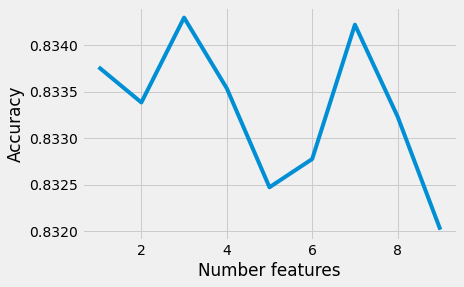

In [144]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for feature in feature_range:
    clf = DecisionTreeClassifier( random_state=1, max_features=feature)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
  
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, accuracy_scores)
plt.xlabel('Number features')
plt.ylabel('Accuracy')

    

In [145]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(2, 0.8342965779467679)

In [146]:
feature_range[2]

3

De esta forma encontramos que con tres features, se encuentra el mejor accuracy de 83.42%. Una vez esto podemos validar la profundidad de los arboles y con los dos parametros max_feature y max_depth, encontrar un mejor modelo.

### Validando profundidad

Text(0, 0.5, 'Accuracy')

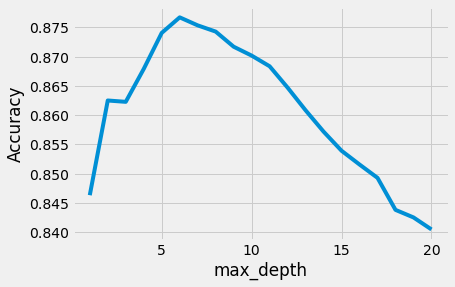

In [147]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [148]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(5, 0.8767300380228138)

In [149]:
max_depth_range[5]

6

Encontramos que la mejor profundidad es de 6. Ahora volvemos a encontrar el mejor max_feature con profundidad de 6 para los arboles

Text(0, 0.5, 'Accuracy')

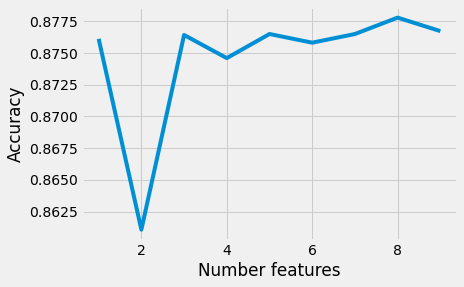

In [150]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for feature in feature_range:
    clf = DecisionTreeClassifier( max_depth=6, random_state=1, max_features=feature)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
  
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, accuracy_scores)
plt.xlabel('Number features')
plt.ylabel('Accuracy')

    

In [151]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(7, 0.8777946768060836)

In [152]:
feature_range[7]

8

En este caso encontramos que con ocho features, se encuentra el mejor accuracy de 87.7%.

# Exercise 8.4

Estimate a Bagging of 10 Decision Tree Classifiers with `max_features = log(n_features)`

Evaluate the accuracy on the testing set

In [153]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier( max_features="log2"), n_estimators=10, bootstrap=True,
                        random_state=123, n_jobs=-1, oob_score=True)

In [154]:
clf.fit(X_train, y_train)
p = clf.predict(X_test)
metrics.accuracy_score(p,y_test)

0.8352534562211982

Con el parametro 'log' encontramos un accuracy de 83.52%. De igual forma validamos como se comporta el accuracy variando el threshold con este modelo:

In [155]:

p = clf.predict_proba(X_test)
p = p[:,1]

In [96]:
p

array([0.2, 1. , 1. , ..., 1. , 1. , 0.1])

In [157]:
threshold = 0
accuracy_scores = []

for threshold in range(1,101,1):
    y_pred = (p >= threshold/100).astype(np.int)
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))    

Text(0, 0.5, 'Accuracy')

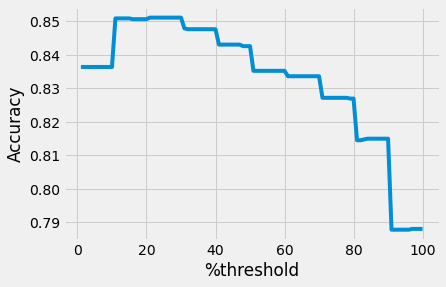

In [158]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(range(1,101,1), accuracy_scores)
plt.xlabel('%threshold')
plt.ylabel('Accuracy')

In [159]:
accuracy_scores.index(max(accuracy_scores)),max(accuracy_scores)

(20, 0.8511520737327188)

# Exercise 8.5

Using sklearn, train a RandomForestClassifier

Evaluate the accuracy on the testing set

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestClassifier()
clf_rf

RandomForestClassifier()

In [12]:
pd.Series(cross_val_score(clf_rf, X, y, cv=10)).describe()

count    10.000000
mean      0.835970
std       0.012024
min       0.818251
25%       0.832319
50%       0.833840
75%       0.840494
max       0.860076
dtype: float64

In [13]:
from sklearn import metrics
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
metrics.accuracy_score(y_pred, y_test.values)

0.8380184331797235

# Exercise 8.6

Find the best parameters of the RandomForestClassifier (max_depth, max_features, n_estimators)

Evaluate the accuracy on the testing set

## - n_estimators

In [12]:
estimator_range = range(10, 310, 10)

accuracy_scores = []

# use 10-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator_range, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

In [14]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

NameError: name 'plt' is not defined

## - max_features

In [15]:
feature_range = range(1, len(feature_cols)+1)

accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=200, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

NameError: name 'feature_cols' is not defined

## - Modelo de Random Forest ajustado a los mejores parámetros

In [16]:
# max_features= XX & n_estimators= XX 
clf = RandomForestClassifier(n_estimators=200, max_features=6, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=200, n_jobs=-1,
                       random_state=1)

In [17]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

NameError: name 'feature_cols' is not defined

# Exercise 8.7 

Using xgboost train a XGBClassifier 

Evaluate the accuracy on the testing set

In [7]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 978 kB/s eta 0:00:01


In [18]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/lorenamorales/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/lorenamorales/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [19]:
from sklearn import metrics
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

(0.8636993076162216, 0.8412442396313364)

In [20]:
#Accuracy
acc= metrics.accuracy_score(y_pred, y_test.values)
print(acc)

0.8412442396313364


# Exercise 8.8

Using xgboost train a XGBClassifier 

Modify the parameters learning rate, gamma, colsample_bytree. Explain what each parameter means.

Evaluate the accuracy on the testing set

* Learning_rate: Se utiliza para evitar el over-fitting, Después de cada boosting,se reducen los pesos de las nuevas funciones para que el proceso sea más conservador.
* Gamma: Es la reducción de pérdida mínima requerida para hacer una partición adicional en un nodo hoja del árbol. Cuanto mayor sea gamma, más conservador será el algoritmo.
* Colsample_bytree: es la proporción de submuestra de columnas al construir cada árbol. El submuestreo ocurre una vez por cada árbol construido.

In [21]:
# Se establece la grilla de parámetros a calibrar
params = {
        'learning_rate': [0.08,0.09, 0.1, 0.11,0.12],
        'gamma': [0.5,0.7,0.9,1,1.1,1,2,1,3, 1.5, 2, 5],
        'colsample_bytree': [0.75, 0.8,0.85,0.9, 1.0],
        }

In [22]:
xgb = XGBClassifier(objective='binary:logistic',
                    silent=True, nthread=1)

NameError: name 'XGBClassifier' is not defined

In [23]:
# Se incluye función de timer para saber cuánto se esta demorando la ejecución
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [24]:
# Aquí se configuran los parámetros establecidos para la búsqueda de grilla, y se usa el auc como medida para determinar el rendimeinto de cada iteración

#las métricas folds, param_comb y n_jobs están bajitas para disminuir el tiempo de ejecución, para una mejor calibración se puede aumentar el número
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
param_comb = 7


folds=10
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=10, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

#Timer y random search
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

NameError: name 'xgb' is not defined

In [25]:
#Impresión de resultados

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)
print(results)


 All results:


NameError: name 'random_search' is not defined

Se ejecuta el modelo con los parámetros calibrados

In [65]:
xgb2 = XGBClassifier(learning_rate=0.12,gamma=0.7,colsamble_bytree=0.85)

In [66]:
xgb2.fit(X_train, y_train)
y_pred = xgb2.predict(X_test)
metrics.accuracy_score(y_pred, y_test.values)

[11:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsamble_bytree" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8820276497695853

### Conclusión
El accuracy del modelo calibrado es de 88.2% siendo mejor que el del modelo sin calibrar que cuenta con un accuracy de 87.9%